In [1]:
import torch
from torchvision import transforms as T
from torchvision import models

In [2]:
category_names = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

In [3]:
model = models.detection.fasterrcnn_resnet50_fpn(pretrained = True)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/gouthamv/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 167502836/167502836 [00:08<00:00, 19850703.77it/s]


In [4]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
        )
  

In [5]:
from PIL import Image

In [68]:
image = Image.open('car.jpg')

In [69]:
image.show()

In [70]:
transform = T.Compose([T.ToTensor()])

In [71]:
transformed_image = transform(image)

In [72]:
transformed_image

tensor([[[0.8863, 0.8863, 0.8863,  ..., 0.4627, 0.3529, 0.3373],
         [0.8863, 0.8863, 0.8863,  ..., 0.4118, 0.3294, 0.1804],
         [0.8902, 0.8902, 0.8902,  ..., 0.1961, 0.2667, 0.3725],
         ...,
         [0.5490, 0.4431, 0.3216,  ..., 0.2000, 0.3569, 0.4863],
         [0.9765, 0.9529, 0.9373,  ..., 0.3569, 0.3490, 0.6706],
         [0.9333, 0.9373, 0.9569,  ..., 0.7216, 0.4196, 0.3529]],

        [[0.8118, 0.8118, 0.8118,  ..., 0.4235, 0.3137, 0.3020],
         [0.8118, 0.8118, 0.8118,  ..., 0.3725, 0.2902, 0.1451],
         [0.8157, 0.8157, 0.8157,  ..., 0.1569, 0.2275, 0.3373],
         ...,
         [0.5490, 0.4431, 0.3216,  ..., 0.2235, 0.4000, 0.5255],
         [0.9765, 0.9529, 0.9373,  ..., 0.3804, 0.3922, 0.7176],
         [0.9333, 0.9373, 0.9569,  ..., 0.7451, 0.4627, 0.4000]],

        [[0.7569, 0.7569, 0.7569,  ..., 0.2824, 0.1725, 0.1490],
         [0.7569, 0.7569, 0.7569,  ..., 0.2314, 0.1490, 0.0000],
         [0.7608, 0.7608, 0.7608,  ..., 0.0157, 0.0863, 0.

In [73]:
prediction = model([transformed_image])

In [74]:
prediction

[{'boxes': tensor([[2217.8472, 1025.8990, 3132.9465, 1468.6497],
          [1630.1268,  737.8433, 1881.3456,  857.3558],
          [1094.6454,  830.5213, 1614.5402, 1058.1296],
          [1938.5692,  820.1554, 2420.2207, 1053.7684],
          [ 498.9932, 1077.9156, 1259.6932, 1534.6874],
          [ 346.8741,  824.2349,  954.8404, 1029.0342],
          [2475.0659,  826.9228, 3108.9443, 1033.8541],
          [2168.5999,  724.6974, 2540.3210,  845.2708],
          [ 960.5250,  735.1721, 1322.6990,  849.7669],
          [1406.5176, 1043.3872, 2051.5359, 1661.7827],
          [ 507.6516,  453.1447,  590.9854,  528.0466],
          [ 664.4172,  847.1533,  718.1904,  898.5822],
          [ 719.2194,  853.0732,  750.5049,  893.4724],
          [ 510.1714,  454.5059,  586.1332,  525.0515],
          [2157.9783,  728.1315, 2555.0269,  849.7114],
          [2626.8726, 1081.0061, 2730.4033, 1166.2146],
          [1346.5868,  864.4411, 1395.6919,  902.9141],
          [ 619.0056,  871.2956,  658.3

In [75]:
prediction[0]['labels']

tensor([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3, 37,  1,  1, 53,  8,  1,  1,  1,
         1,  8])

In [76]:
predicted_classes = [category_names[i] for i in prediction[0]['labels']]

In [77]:
predicted_classes

['car',
 'car',
 'car',
 'car',
 'car',
 'car',
 'car',
 'car',
 'car',
 'car',
 'sports ball',
 'person',
 'person',
 'apple',
 'truck',
 'person',
 'person',
 'person',
 'person',
 'truck']

In [78]:
predicted_scores = [i for i in prediction[0]['scores'].detach().numpy()]

In [79]:
predicted_scores

[0.99860305,
 0.99837047,
 0.9977598,
 0.99725264,
 0.99681455,
 0.99389344,
 0.99135685,
 0.990708,
 0.99041325,
 0.9887356,
 0.4411943,
 0.3253886,
 0.2883525,
 0.07586329,
 0.07172051,
 0.06868721,
 0.06274121,
 0.061929233,
 0.05778204,
 0.052138224]

In [80]:
bounding_boxes = [[(i[0], i[1]),(i[2], i[3])] for i in list(prediction[0]['boxes'].detach().numpy())]

In [81]:
bounding_boxes

[[(2217.8472, 1025.899), (3132.9465, 1468.6497)],
 [(1630.1268, 737.84326), (1881.3456, 857.35583)],
 [(1094.6454, 830.5213), (1614.5402, 1058.1296)],
 [(1938.5692, 820.1554), (2420.2207, 1053.7684)],
 [(498.99323, 1077.9156), (1259.6932, 1534.6874)],
 [(346.8741, 824.2349), (954.8404, 1029.0342)],
 [(2475.066, 826.9228), (3108.9443, 1033.8541)],
 [(2168.5999, 724.69745), (2540.321, 845.27075)],
 [(960.52496, 735.1721), (1322.699, 849.7669)],
 [(1406.5176, 1043.3872), (2051.536, 1661.7827)],
 [(507.65158, 453.14474), (590.98535, 528.0466)],
 [(664.4172, 847.15326), (718.1904, 898.58215)],
 [(719.21936, 853.07324), (750.50494, 893.4724)],
 [(510.1714, 454.50592), (586.1332, 525.05145)],
 [(2157.9783, 728.13153), (2555.0269, 849.7114)],
 [(2626.8726, 1081.0061), (2730.4033, 1166.2146)],
 [(1346.5868, 864.4411), (1395.6919, 902.9141)],
 [(619.0056, 871.2956), (658.3873, 900.16797)],
 [(684.8362, 855.2062), (725.67816, 896.95544)],
 [(2468.2715, 836.1246), (3149.9514, 1014.77216)]]

In [82]:
predicted_scores

[0.99860305,
 0.99837047,
 0.9977598,
 0.99725264,
 0.99681455,
 0.99389344,
 0.99135685,
 0.990708,
 0.99041325,
 0.9887356,
 0.4411943,
 0.3253886,
 0.2883525,
 0.07586329,
 0.07172051,
 0.06868721,
 0.06274121,
 0.061929233,
 0.05778204,
 0.052138224]

In [83]:
prediction_threshold = [predicted_scores.index(x) for x in predicted_scores if x > 0.5]

In [84]:
prediction_threshold

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [85]:
len(prediction_threshold)

10

In [86]:
predicted_classes = predicted_classes[:len(prediction_threshold)]

In [87]:
predicted_classes

['car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car']

In [88]:
bounding_boxes = bounding_boxes[:len(prediction_threshold)]

In [89]:
bounding_boxes

[[(2217.8472, 1025.899), (3132.9465, 1468.6497)],
 [(1630.1268, 737.84326), (1881.3456, 857.35583)],
 [(1094.6454, 830.5213), (1614.5402, 1058.1296)],
 [(1938.5692, 820.1554), (2420.2207, 1053.7684)],
 [(498.99323, 1077.9156), (1259.6932, 1534.6874)],
 [(346.8741, 824.2349), (954.8404, 1029.0342)],
 [(2475.066, 826.9228), (3108.9443, 1033.8541)],
 [(2168.5999, 724.69745), (2540.321, 845.27075)],
 [(960.52496, 735.1721), (1322.699, 849.7669)],
 [(1406.5176, 1043.3872), (2051.536, 1661.7827)]]

In [90]:
import cv2

In [105]:
img = cv2.imread('car.jpg')

In [106]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [107]:
for i in range(len(bounding_boxes)):
    cv2.rectangle(img, bounding_boxes[i][0], bounding_boxes[i][1], color = (0,255,0), thickness = 3)
    cv2.putText(img, predicted_classes[i], bounding_boxes[i][0], fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 3, color = (255, 0,0), thickness = 2)

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
plt.figure(figsize=(50,50))

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

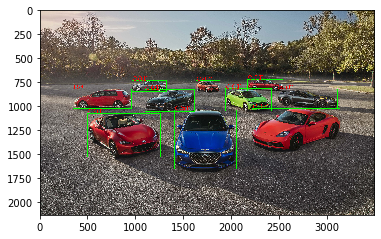

In [110]:
plt.imshow(img)